# Movies Recommendation Engine

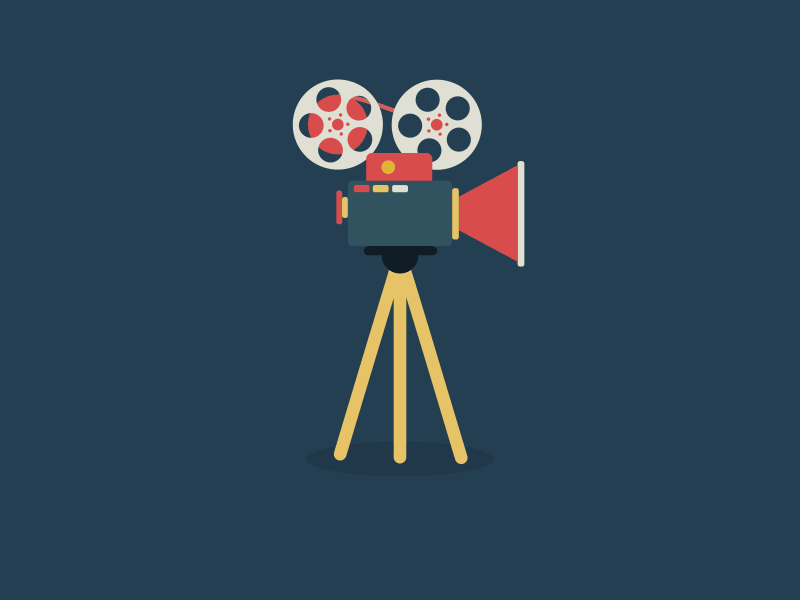

**What is a Recommendation Engine?**

A recommendation engine is a system that suggests products, services, information to users based on analysis of data. Notwithstanding, the recommendation can derive from a variety of factors such as the history of the user and the behaviour of similar users.A recommendation engine filters the data using different algorithms and recommends the most relevant items to users. It first captures the past behavior of a customer and based on that, recommends products which the users might be likely to buy

Recommendation systems are quickly becoming the primary way for users to expose to the whole digital world through the lens of their experiences, behaviours, preferences and interests. And in a world of information density and product overload, a recommendation engine provides an efficient way for companies to provide consumers with personalised information and solutions.

**What are the benefits of the Recommendation Engine?**

Let’s take Netflix as an example. Instead of having to browse through thousands of box sets and movie titles, Netflix presents you with a much narrower selection of items that you are likely to enjoy. This capability saves you time and delivers a better user experience. With this function, Netflix achieved lower cancellation rates, saving the company around a billion dollars a year.
Although recommender systems have been used for almost 20 years by companies like Amazon, it has been proliferated to other industries such as finance and travel during the last few years.

There are three main types of techniques for Recommendation systems:-



1.  Content-based filtering

1.  Collaborative filtering

1.  Knowledge-based system 




**Today in this kernel  I will be building a Beginner friendly Movie Recommendation System using TMDB 5000 Movie Dataset. I'm sure after having a look on this kernal you will be able to understand foundation of Recommendation Engine.**

So for Now I have given good decent introduction for Recommendation System.Let's continue and discuss the types of recommendation system(Filtering).
 

# **Content based filtering**
Content-based filtering is based on a single user’s interactions and preference. Recommendations are based on the metadata collected from a user’s history and interactions.This algorithm recommends products which are similar to the ones that a user has liked in the past.

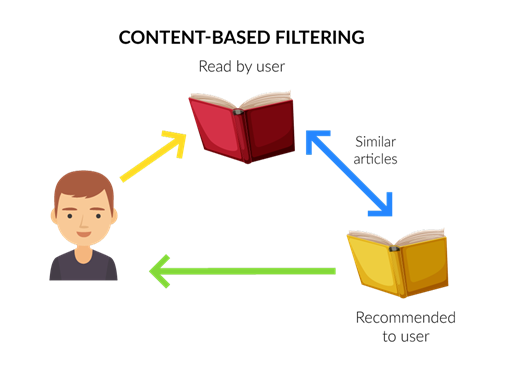

The content-based filtering algorithm finds the cosine of the angle between the profile vector and item vector, i.e. cosine similarity. Suppose A is the profile vector and B is the item vector, then the similarity between them can be calculated as:



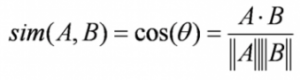

Based on the cosine value, which ranges between -1 to 1, the movies are arranged in descending order and one of the two below approaches is used for recommendations:


*   **Top-n approach:** where the top n movies are recommended (Here n can be decided by the business)
*   **Rating scale approach:** Where a threshold is set and all the movies above that threshold are recommended

Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. In this context, the two vectors I am talking about are arrays containing the word counts of two documents.



Okay now let's do the practical works with importing the data.

In [ ]:
#Libraries
import pandas as pd
import numpy as np

In [ ]:
credits = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
movies = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [ ]:
credits.head()

In [ ]:
movies.head()

Here in our dataset **credits** data contains 4 columns:-


*   movie_id

*   title	
*   cast


*   crew



**Movies** Dataset:-


*   budget - The budget in which the movie was made.

*  genre - The genre of the movie, Action, Comedy ,Thriller etc

*  homepage - A link to the homepage of the movie.

*   id - This is infact the movie_id as in the first dataset.

*   keywords - The keywords or tags related to the movie.


*   original_language - The language in which the movie was made.


*   original_title - The title of the movie before translation or adaptation.


*   overview - A brief description of the movie.


*   popularity - A numeric quantity specifying the movie popularity.


*  production_companies - The production house of the movie.


*   production_countries - The country in which it was produced.
*   release_date - The date on which it was released.


*   revenue - The worldwide revenue generated by the movie.
*   runtime - The running time of the movie in minutes.


*  status - "Released" or "Rumored".
*  tagline - Movie's tagline.


*   title - Title of the movie.
*   vote_average - average ratings the movie recieved.


*  vote_count - the count of votes recieved.
















In [ ]:
#Shape of the dataset
print('Credits Shape:-',credits.shape)
print('Movies Data Shape :-',movies.shape)

Let's do some exploration on the dataset with few cleaning as well.

In [ ]:
credits.columns

In [ ]:
movies.columns

In [ ]:
movies.describe().T

In [ ]:
movies.isnull().sum()

*homepage*, *tagline*, *runtime*,*release_date* contains Null values.

In [ ]:
credits.isnull().sum()

In [ ]:
vote_avg = movies['vote_average'].mean()
print("Vote Average:-",vote_avg)

In [ ]:
movies['overview'].sample(10)

In [ ]:
movies['keywords'].sample(10)

In [ ]:
movies['production_companies'].head()

Now here I'll convert all the columns which are in JSON format to string.

---



In [ ]:
#Merged DataFrame
#movies.head(10)
movies.columns

In [ ]:
movies = movies.merge(credits,on='title')

Finally lets convert all the JSON format data.

In [ ]:
#Importing the json librarie 
import json
import ast
ast.literal_eval

# **Converting  Into String Format**

In [ ]:
# changing the genres column from json to string
movies['genres'] = movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) 
    movies.loc[index,'genres'] = str(list1)

In [ ]:
# changing the keywords column from json to string
movies['keywords'] = movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords'] = str(list1)

In [ ]:
# changing the production_companies column from json to string
movies['production_companies'] = movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies'] = str(list1)

In [ ]:
# changing the cast column from json to string
movies['cast'] = movies['cast'].apply(json.loads)
for index,i in zip(movies.index,movies['cast']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'cast'] = str(list1)

In [ ]:
# changing the production_countries column from json to string
movies['production_countries'] = movies['production_countries'].apply(json.loads)
for index,i in zip(movies.index,movies['production_countries']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_countries'] = str(list1)

In [ ]:
# changing the spoken_languages column from json to string
movies['spoken_languages'] = movies['spoken_languages'].apply(json.loads)
for index,i in zip(movies.index,movies['spoken_languages']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'spoken_languages'] = str(list1)

In [ ]:
# changing the crew column from json to string

movies['crew'] = movies['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
movies['crew'] = movies['crew'].apply(director)
movies.rename(columns={'crew':'director'},inplace=True)

In [ ]:
movies.head()

In [ ]:
movies = movies[['id','original_title','genres','cast','director','vote_average','keywords']]

In [ ]:
movies.iloc[45]

Here you can notice there are so many irrelevent features which doesn't give any sense.

In [ ]:
'''def get_5(text):
  list1 = []
  counter = 0
  for i in ast.literal_eval(text):
    if counter < 5:
      list1.append(i['name'])
      counter = counter + 1
      return list1

movies['cast'] = movies['cast'].apply(get_5)'''

In [ ]:
'''def get_companies(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 2:
            L.append(i['name'])
            counter = counter + 1
    return L
movies['production_companies'] = movies['production_companies'].apply(get_companies)

def get_contries(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 1:
            L.append(i['name'])
            counter = counter + 1
    return L
movies['production_countries'] = movies['production_countries'].apply(get_contries)

ef get_language(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 2:
            L.append(i['name'])
            counter = counter + 1
    return L
movies['spoken_languages'] = movies['spoken_languages'].apply(get_language)'''

Here you can notice there are so many irrelevent features which doesn't give any sense.

In [ ]:
movies.shape

In [ ]:
movies.iloc[45]

In [ ]:
movies.dtypes

In [ ]:
movies.isnull().sum()

Droping Nan values

In [ ]:
movies.dropna(inplace=True)

# Visual Exploration of Genres

In [ ]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

After observation ***drama*** appears to be the most joners in system.

# Cast Column::

In [ ]:
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast'] = movies['cast'].str.split(',')

In [ ]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('Set2'))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='black',weight='bold')
plt.title('Top Actors',fontsize='25')
plt.show()

In [ ]:
def space(col):
  if col is None:
    return ' '
  return str(col)

In [ ]:
movies['director'] = movies['director'].apply(space)

In [ ]:
plt.subplots(figsize=(12,10))
ax=movies[movies['director']!=''].director.value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('Set2'))
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='black',weight='bold')
plt.title('Directors',fontsize='25')
plt.show()

In [ ]:
movies.head()

# Building the Recommendation Engine

We can create combine features function now , which will be a string that contains all metadata(Keywords,Cast,Director and Genres) about movie that we want to feed our vectorize

In [ ]:
def features(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

movies['combine_feature'] = movies.apply(features,axis=1)

In [ ]:
movies[['original_title','combine_feature']]

In [ ]:
#Importing Sckit learn libraries for calculating Cosine Similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cv = CountVectorizer(stop_words='english') #creating new CountVectorizer() object
count_matrix = cv.fit_transform(movies["combine_feature"]) #feeding combined strings(movie contents) to CountVectorizer() object
cosine_sin = cosine_similarity(count_matrix,count_matrix)

Now i will define the function to get recommendation for the movies that takes in a movie title as an input and outputs a list of the 10 most similar movies.

In [ ]:
# Reset index of our main DataFrame and construct reverse mapping as before
movies = movies.reset_index()
indices = pd.Series(movies.index, index = movies['original_title'])

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def hey_give_me_the_recommendations(title, cosine_sim=cosine_sin):

    # Get the index of the movie that matches the title
    idx = indices[title]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    
    print('-----------Movies-Recommended-----------------')
    print('---'*15)
    return movies['original_title'].iloc[movie_indices]

  Let's generate the recommendation.

In [ ]:
#Haunted Movie 
hey_give_me_the_recommendations('The Conjuring')

In [ ]:
#Army Based,War
hey_give_me_the_recommendations('Fury')

In [ ]:
#Romantic-Drama
hey_give_me_the_recommendations('The Vow')

In [ ]:
#Adventure/Action
hey_give_me_the_recommendations('The Mummy Returns')

Here I think model not performing appropriate on with *Adventure/Action* geners..

In [ ]:
#Sci/Fiction
hey_give_me_the_recommendations('Avatar')